In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def outliers_z_score(ys):
    threshold = 1.5

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

def outliers_modified_z_score(ys):
    threshold = 2

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [0]:
sns.set(style="whitegrid", color_codes=True)

# Treino GPU

In [3]:
from google.colab import files
uploaded = files.upload()
mu = pd.read_csv('training.csv', sep=',', encoding='utf-8')

Saving training.csv to training.csv


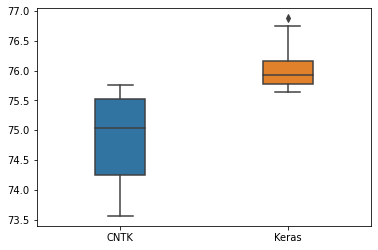

In [4]:
sns.boxplot(data=mu, width=0.3, whis=1.5)

KS Test

In [5]:
tf = mu.CNTK
print(stats.kstest(tf, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)


In [6]:
pt = mu.Keras
print(stats.kstest(pt, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)


In [7]:
print(stats.wilcoxon(tf,pt))

WilcoxonResult(statistic=7.0, pvalue=4.813701823147399e-18)


# Teste GPU

In [8]:
from google.colab import files
uploaded = files.upload()
tau = pd.read_csv('testing.csv', sep=',', encoding='utf-8')

Saving testing.csv to testing.csv


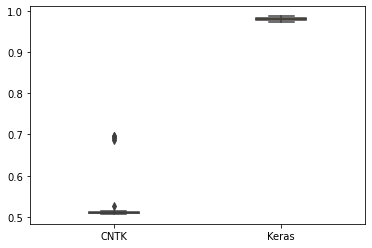

In [9]:
sns.boxplot(data=tau, width=0.3, whis=1.5)

KS TEST

In [10]:
tf = tau.CNTK
print(stats.kstest(tf, 'norm'))

KstestResult(statistic=0.6941169213797755, pvalue=1.1652023420547113e-48)


In [11]:
pt = tau.Keras
print(stats.kstest(pt, 'norm'))

KstestResult(statistic=0.834730306921238, pvalue=3.371432263345957e-78)


In [12]:
print(stats.wilcoxon(tf,pt))

WilcoxonResult(statistic=0.0, pvalue=3.896559845095909e-18)
